# Introduction and Importing Data
In the Python exercises we'll look at a powerful, and well-known Python library called scikit-learn. This is accessed programmatically using Python code, so has a steeper learning curve than Orange's GUI-driven approach, but is more flexible and powerful. Orange actually makes use of this library for some of its modelling; Orange can also be called programmatically via an API, but scikit-learn is very popular and worth knowing about in its own right.

In this exercise, we'll load the data, plot the distributions and try cleaning the data, as you've already done in Orange. We're using the same motor premiums data you've already seen so it should all be every familiar.

scikit-learn uses pandas and numpy objects to contain the raw data, so we'll begin by importing them and loading the data... 

(remember, click on a cell, then control+enter will run it)

In [7]:
import pandas as pd
import numpy as np

# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("/content/MotorPremiums.csv")

In [5]:
pwd

'/content'

Let's take a look at the data before doing anything else...

In the first Orange exercise, we asked:

* How many rows (instances) are there in the data?
* How many columns (variables) are there?

We can find out the same here like this:

In [8]:
df.shape

(4387, 12)

It's also helpful to take a look at the first few rows of the data, which we can do like this:

In [9]:
df.head()

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,B69193007,52,M,UK,16,0,0,1200,4,Garage,2,195.32
1,B58763002,46,F,UK,22,8,1,1400,2,Garage,7,225.09
2,A57010377,59,F,UK,9,0,0,1400,5,Garage,14,201.08
3,B61470950,62,M,UK,35,0,0,1400,4,0,12,211.76
4,B43586226,59,F,UK,3,0,4,1400,5,Road,13,251.49


You can also type "df" on its own to see the first and last few rows.

One more useful command is describe, which will give us summary statistics on each of the columns and can be useful for spotting any issues early on. ("include=all" is needed to include all columns, otherwise we'll just get stats for numeric ones)

In [10]:
df.describe(include="all")

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
count,4387,4387.000000,4387,4387,4387.000000,4387.000000,4387.000000,4387.000000,4387.000000,4387,4387.000000,4387.000000
unique,4387,NaN,4,3,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,B11954500,NaN,M,UK,NaN,NaN,NaN,NaN,NaN,Garage,NaN,NaN
freq,1,NaN,2232,4380,NaN,NaN,NaN,NaN,NaN,3057,NaN,NaN
mean,NaN,49.435605,NaN,NaN,16.537041,0.813312,2.038067,1374.470025,4.306816,NaN,5.903579,220.793829
std,NaN,18.037774,NaN,NaN,13.758559,2.179899,1.424706,214.020981,1.501104,NaN,5.106129,22.207691
min,NaN,18.000000,NaN,NaN,1.000000,0.000000,0.000000,1200.000000,2.000000,NaN,1.000000,154.220000
25%,NaN,34.000000,NaN,NaN,5.000000,0.000000,1.000000,1200.000000,3.000000,NaN,2.000000,204.810000
50%,NaN,50.000000,NaN,NaN,13.000000,0.000000,2.000000,1400.000000,4.000000,NaN,4.000000,220.890000
75%,NaN,65.000000,NaN,NaN,25.000000,0.000000,3.000000,1400.000000,6.000000,NaN,9.000000,235.960000


This data set is (despite the errors you know about!) nice and clean. Many real-world data sets have missing or outlier values, duplicates, corrupted strings or some other noise that can cause trouble for our models. We'll have a brief look at data cleaning in this exercise but when you've completed the exercise it would be worth doing some further reading on approaches to cleaning data in Python (building on what you learned in ITNPBD2 if you were on that module). A couple of good guides are:

(https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3)
(https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch04.html)


As well as the scikit-learn documentation on preprocessing: (https://scikit-learn.org/stable/modules/preprocessing.html)

# Variables and Types
Now we'll list the types of the columns...

In [11]:
df.dtypes

ID                 object
Age                 int64
Gender             object
LicenceCountry     object
Yrs DL              int64
Points              int64
NCD                 int64
Engine cc           int64
Ins Group           int64
Stored             object
Car Age             int64
Premium           float64
dtype: object

Not quite as user friendly as Orange! However, it should be clear that the Pandas library has made a distinction between the two numeric types. int64 is an integer (discrete) and float64 is a floating point number (continuous). object is a categorical variable.

# Distributions
Let's plot the distributions of our data...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7293f65630>,
      dtype=object)

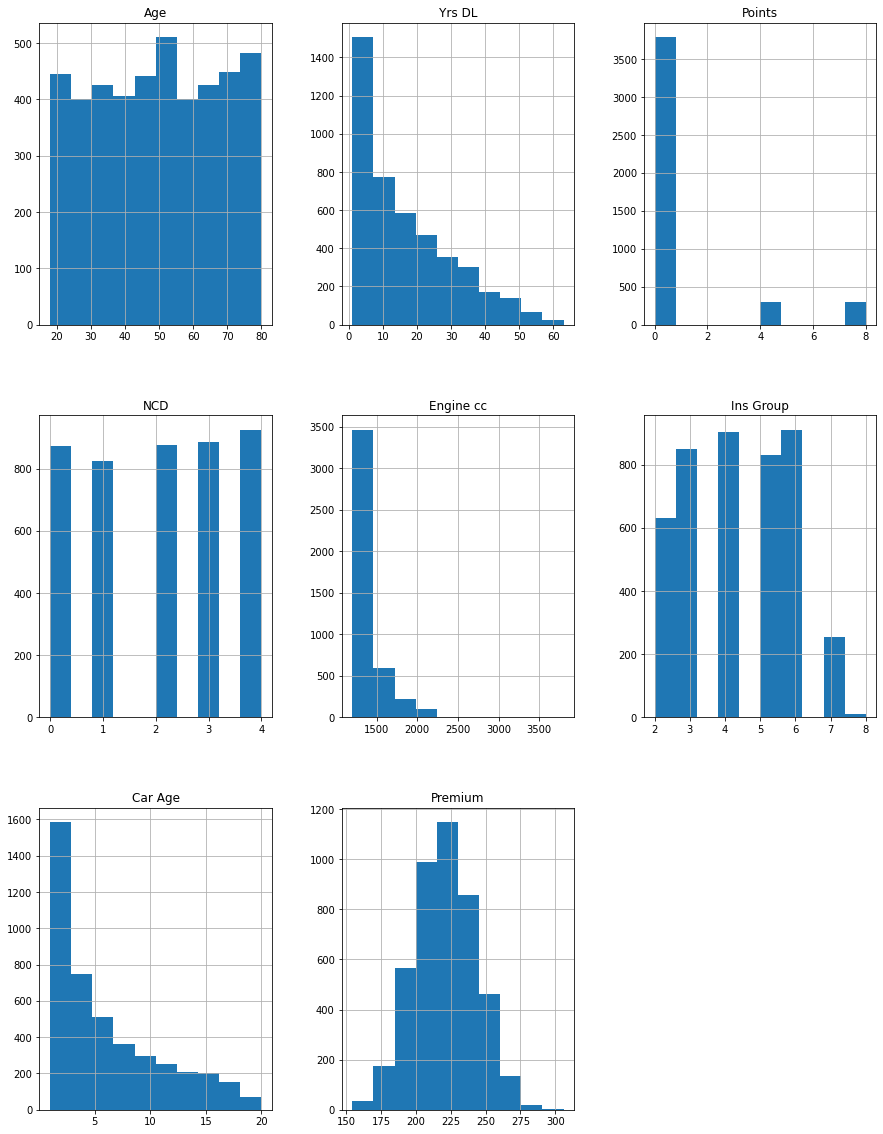

In [12]:
df.hist(figsize = (15,20))

We are missing some variables...

Those are the non-numeric ones: ID; Gender; LicenceCountry and Stored. There's not really an easy way to handle these, so we'll try a bar plot one at a time for them.

NOTE this will take around a minute to run because of the first variable, so be patient.

,ID,Gender,LicenceCountry,Stored
0,B69193007,M,UK,Garage
1,B58763002,F,UK,Garage
2,A57010377,F,UK,Garage
3,B61470950,M,UK,0
4,B43586226,F,UK,Road
...,...,...,...,...
4382,A1126336,M,UK,Garage
4383,B56077025,F,UK,Road
4384,B30440487,M,UK,Road
4385,A48556843,F,UK,Road


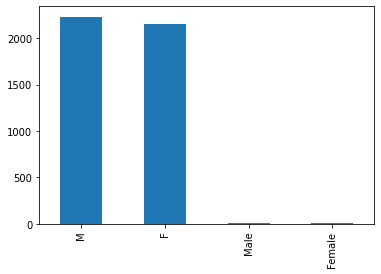

In [14]:
# this will make a bar plot for one variable...
df['Gender'].value_counts().plot(kind='bar')

# this will list the non-numeric columns...
df.select_dtypes(include=object)

ID


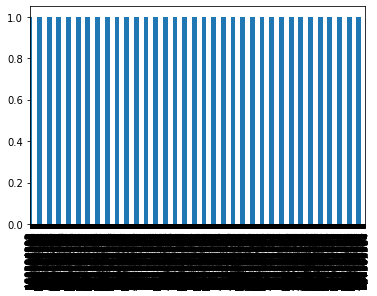

Gender


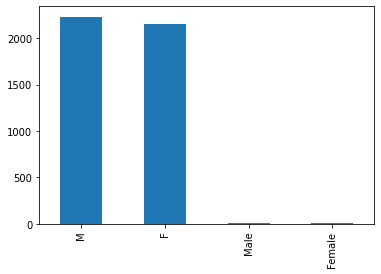

LicenceCountry


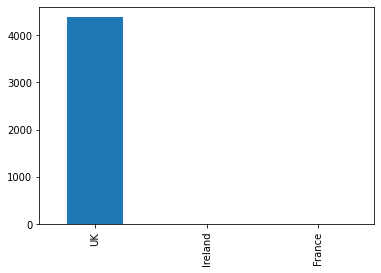

Stored


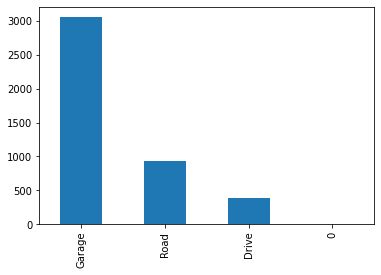

In [13]:
 

# so loop over all of them; count each unique value, and plot...
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=object).columns: 
    print(col)
    df[col].value_counts().plot(kind='bar')
    plt.show()

We can clearly see the minority values; there's also a 0 that is probably a missing value. ID is also clearly flat and wide, so we'll be dropping that when we move to modelling.

# Data cleaning

As in the Orange exercise, Gender appears to have "Female" sometimes when it should be "F", and likewise for "Male" and "M". "Stored" seems to have a few entries that are missing, and we might want to remove the "LicenceCountry" feature as it doesn’t look all that useful. We'll also explicitly remove the ID variable.

First, let's delete the rows where LicenceCountry is not the UK...

In [15]:
# copy the data frame so we've still got the original in case we need it
df_cleaned = df.copy()

# choose the rows we want to keep
df_cleaned = df_cleaned[(df_cleaned.LicenceCountry=="UK") & (df_cleaned.Stored!="0")]

# this is needed so the row numbers are still in sequence
df_cleaned.reset_index(drop=True)

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,B69193007,52,M,UK,16,0,0,1200,4,Garage,2,195.32
1,B58763002,46,F,UK,22,8,1,1400,2,Garage,7,225.09
2,A57010377,59,F,UK,9,0,0,1400,5,Garage,14,201.08
3,B43586226,59,F,UK,3,0,4,1400,5,Road,13,251.49
4,B78248875,78,M,UK,57,4,1,1800,3,Garage,1,229.46
...,...,...,...,...,...,...,...,...,...,...,...,...
4369,A1126336,28,M,UK,8,0,3,1200,4,Garage,1,214.03
4370,B56077025,76,F,UK,41,0,4,1600,5,Road,1,265.50
4371,B30440487,50,M,UK,32,0,4,1200,2,Road,1,250.51
4372,A48556843,36,F,UK,12,8,3,1200,5,Road,1,264.92


Check it's worked: there should only be one bar now!

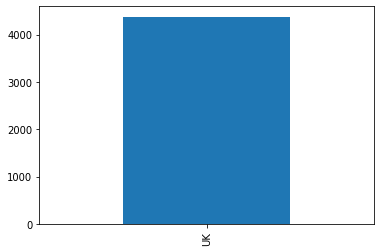

In [16]:
df_cleaned['LicenceCountry'].value_counts().plot(kind='bar')

And only three bars here...

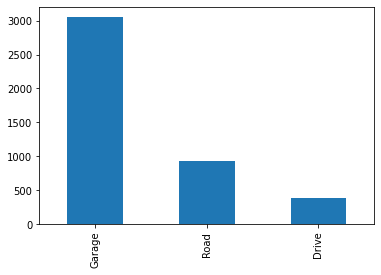

In [17]:
df_cleaned['Stored'].value_counts().plot(kind='bar')

Now, let's select only the columns we want to keep...

In [18]:
# define the list of features to keep
selected_features = ['Age','Gender','Yrs DL','Points','NCD','Engine cc',
                     'Ins Group','Stored','Car Age','Premium']

# update the data frame
df_cleaned = df_cleaned[selected_features]

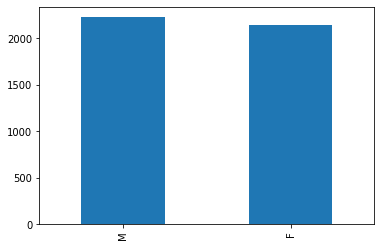

In [19]:
# The histogram showed us Gender had some 'Female' and 'Male' values, which we'll map to F and M
# we can use a dictionary to set up the mapping...
df_cleaned['Gender'] = df_cleaned['Gender'].replace({'Female':'F','Male':'M'})

# just to check it's worked...
df_cleaned['Gender'].value_counts().plot(kind='bar')

# Encoding variables

A few of the variables above are not numeric: *Gender* and *Stored* are strings (categorical). In theory it is possible for some model types (for example, trees) to use categorical variables directly, but sklearn does not support this. So for the model to work with this data, we'll need to convert these variables to numeric values. (Orange does this automatically in the background)

sklearn provides a couple of encoders to do this:
* sklearn.preprocessing.OrdinalEncoder - for string variables where there is a natural order to the values (e.g. "light"/"medium"/"heavy") - *ordinal* variables - this will transform the values into 0,1,2,3...
* sklearn.preprocessing.OneHotEncoder - for string variables where there is no natural order to the values (e.g. place names, job titles) - *nominal* variables - this will create a new feature for each possible value, with the value 0 or 1.

You can read more about the encoders [here](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) and how you might combine them for mixed-type data [here](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html).

In our data, *Gender* and *Stored* do not have a natural order, so we want one-hot encoding. While the encoders above are arguably more flexible, a simpler way to apply one-hot encoding is built in to pandas, and that's what we'll use...

In [20]:
df_cleaned = pd.get_dummies(df_cleaned, prefix_sep='_', drop_first=True)

This function takes a data frame and returns another data frame with the transformation applied. The argument *prefix_sep='_'* is used to make the names of the newly created features;  *drop_first=True* removes one column from the resulting dummy features; this is to avoid multicollinearity, which can be a [problem](https://www.algosome.com/articles/dummy-variable-trap-regression.html) for some model types. Let's take a look at the data now:

In [21]:
df_cleaned.head()

,Age,Yrs DL,Points,NCD,Engine cc,Ins Group,Car Age,Premium,Gender_M,Stored_Garage,Stored_Road
0,52,16,0,0,1200,4,2,195.32,1,1,0
1,46,22,8,1,1400,2,7,225.09,0,1,0
2,59,9,0,0,1400,5,14,201.08,0,1,0
4,59,3,0,4,1400,5,13,251.49,0,0,1
5,78,57,4,1,1800,3,1,229.46,1,1,0


You can see that we've now created some extra columns in place of Gender and Stored.

# Set the features and targets
We can now extract the columns we want for features and targets as numpy arrays ready for passing to a model. By convention, we use names including `X` as the 2-D array of features, and `y` as the 1-D array of targets.

In [22]:
targetName="Premium"
df_cleaned.columns.get_loc(targetName)
featureNames=df_cleaned.columns[np.where(df_cleaned.columns != targetName)]
X = df_cleaned[featureNames].values
y = df_cleaned[targetName].values.ravel()

# Normalising
It's also a good idea to normalise the features: ensuring they are all in the range 0...1. The simplest approach is, for each feature, to subtract the minimum value and divide by the range. This can be done as follows:

In [23]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

Should you later want to apply the same scaling to new data, this can be doner by calling `mm_scaler.transform(X_test)`, where `X_test` is the variable holding the new data set. The same can be done with the encoders. How does our data look now? Rather different to when we started...

In [24]:
X, y

(array([[0.5483871 , 0.24193548, 0.        , ..., 1.        , 1.        ,
         0.        ],
        [0.4516129 , 0.33870968, 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.66129032, 0.12903226, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.51612903, 0.5       , 0.        , ..., 1.        , 0.        ,
         1.        ],
        [0.29032258, 0.17741935, 1.        , ..., 0.        , 0.        ,
         1.        ],
        [0.29032258, 0.01612903, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([195.32, 225.09, 201.08, ..., 250.51, 264.92, 208.95]))

# Unbalanced Data
As with our earlier exercise in Orange, we'll now load in an example data set that is unbalanced. For simplicity we'll just load the churn data set we used before. There isn't an easy way to get the example data like we did in Orange, so we've provided it as one of the file downloads for this session. For reference, it comes from here: https://www.kaggle.com/blastchar/telco-customer-churn

In [26]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

First, we'll take a look at the data, and our target variable *Churn*

In [27]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


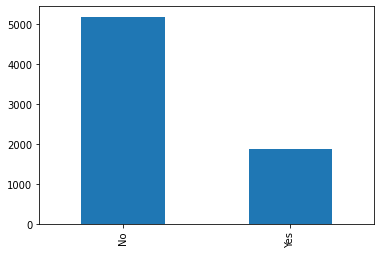

In [28]:
df['Churn'].value_counts().plot(kind='bar')

It's only two lines of code to rebalance the data in Python, but it takes some explaining...

First we identify the groups in our data that we want to balance, using the `groupby()` function. We tell the function that we want to use the values in *Churn* to make the groups. This function returns a DataFrameGroupBy object, a collection of DataFrames, one for each groups. We store the DataFrameGroupBy object in *g*.

Now we'll explain what is happening in the second line:

`g.size().min()` finds the size of the smallest group in our data. We determined this by hand in Orange.

`x.sample(v)` chooses a random set of `v` rows from the data frame `x`. We used the Data Sampler for this in Orange.

`lambda x: x.sample(g.size().min()))` is a [Lambda function](https://www.w3schools.com/python/python_lambda.asp). This basically says "every time we are given a data frame object called `x` I want you to sample some values from it to make a smaller data frame"

`g.apply(...)` is a function on the DataFrameGroupBy object. What it does is call the lambda function for each of the groups. So it's saying "run the sampling operation on each group please".

`pd.DataFrame()` joins all the groups back together into one data frame again. This was done by the Concatenate widget in Orange.

`.reset_index(drop=True)` is needed to reset the row numbers in the data frame after we're done.

You might notice that we're sampling all the groups, and this will include the smallest one, which doesn't actually need sampled. That's okay, because the kind of sampling we're doing will just get everything if the required number of samples is the same as what's already in the data frame.

In [29]:
g = df.groupby('Churn')

df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)

Let's check the data for balance again...

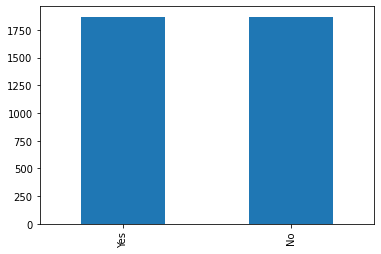

In [30]:
df['Churn'].value_counts().plot(kind='bar')

In [31]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7602-MVRMB,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.45,8058.85,No
1,3714-NTNFO,Female,0,No,No,49,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.50,3906.7,No
2,5884-FBCTL,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.10,1857.85,No
3,5181-OABFK,Female,0,Yes,Yes,56,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Credit card (automatic),61.30,3346.8,No
4,6652-YFFJO,Female,0,No,No,11,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,64.90,716.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,3285-UCQVC,Female,0,No,No,37,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic),28.60,973.55,Yes
3734,7881-INRLC,Male,0,No,No,45,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.85,4740,Yes
3735,7028-DVOIQ,Male,1,No,No,35,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.05,3395.8,Yes
3736,0495-RVCBF,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.70,79.7,Yes


Excellent! It's nicely balanced. Well done: that's the end of this exercise.